### Selecting Features for the Numerical Output
The simples case of feature seleciton is the case where there are numerical input variables and a numerical target for regression predictive modeling. This is becasue the strength of the relationship between each input variable and the target variable can be calculated, called orrelation, and compared realtive to each other.

For this we will use a synthetic regression dataset as the basis of this tutorial. We will use make_regression() function from the scikit-learn library to define a dataset. It provides control over the number of samples, number of input features, and importantly, the number of relevant and irrelevant imput features. this is critical as we specifically desire a dataset that we know has some irrelevant input features. In this case, we will difine a dataset with 1,000 samples, each with 100 input features where 10 are informative and the remaining 90 are irrelevant.

#### Correlation Feature Selection
Linear correlaiton score are typically a value between -1 and 1 with 0 representing no relationship. For feature selection, scores are made positive and we are often positive socre with the larger the positive value, the larger the relationship, and, more likely, into a correlation statistic with inly positive values.

The scikit-learn machine library provides an implementation of the correlation statistic in as the f_regression() function. This funcion can be used in a feature selection strategy, such as selecting the top k most relevant features via the SelectKBest class.

Features: 0 0.009
Features: 1 1.019
Features: 2 1.205
Features: 3 0.000
Features: 4 0.168
Features: 5 5.985
Features: 6 0.062
Features: 7 1.455
Features: 8 0.420
Features: 9 101.392
Features: 10 0.387
Features: 11 1.581
Features: 12 3.014
Features: 13 0.233
Features: 14 0.076
Features: 15 4.300
Features: 16 1.498
Features: 17 0.261
Features: 18 5.960
Features: 19 0.523
Features: 20 0.003
Features: 21 0.024
Features: 22 0.221
Features: 23 0.577
Features: 24 0.627
Features: 25 0.351
Features: 26 0.282
Features: 27 0.584
Features: 28 52.196
Features: 29 0.047
Features: 30 0.147
Features: 31 0.368
Features: 32 0.078
Features: 33 0.698
Features: 34 45.744
Features: 35 2.047
Features: 36 0.786
Features: 37 0.996
Features: 38 2.734
Features: 39 63.958
Features: 40 231.886
Features: 41 1.372
Features: 42 0.582
Features: 43 1.073
Features: 44 1.067
Features: 45 0.345
Features: 46 13.952
Features: 47 3.575
Features: 48 0.007
Features: 49 0.005
Features: 50 1.095
Features: 51 0.241
Features: 52 0

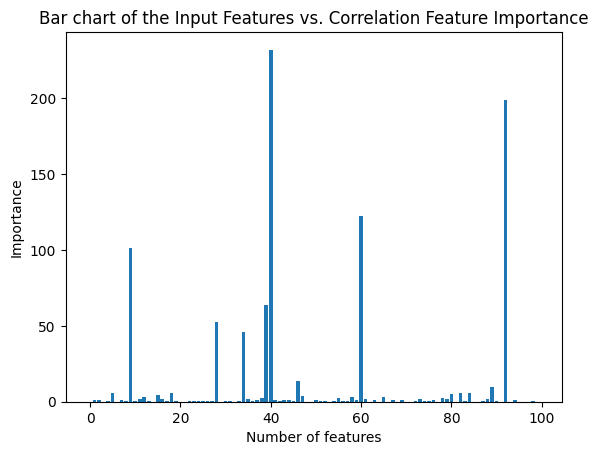

In [3]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func= f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
#lets make a synthetic regression
X, y = make_regression(n_samples= 1000, n_features= 100, n_informative= 10, noise=0.1, random_state= 1)
#Split it into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print(f"Features: {i} {fs.scores_[i]:.3f}")

# Now we will plot the graph
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('Bar chart of the Input Features vs. Correlation Feature Importance')
plt.xlabel('Number of features')
plt.ylabel('Importance')
plt.show()

#### Mutual Information Feature Selection

Features: 0 0.045
Features: 1 0.000
Features: 2 0.000
Features: 3 0.000
Features: 4 0.025
Features: 5 0.000
Features: 6 0.023
Features: 7 0.000
Features: 8 0.000
Features: 9 0.074
Features: 10 0.000
Features: 11 0.000
Features: 12 0.000
Features: 13 0.000
Features: 14 0.020
Features: 15 0.004
Features: 16 0.000
Features: 17 0.000
Features: 18 0.017
Features: 19 0.004
Features: 20 0.008
Features: 21 0.019
Features: 22 0.025
Features: 23 0.018
Features: 24 0.069
Features: 25 0.000
Features: 26 0.022
Features: 27 0.000
Features: 28 0.008
Features: 29 0.013
Features: 30 0.017
Features: 31 0.008
Features: 32 0.047
Features: 33 0.003
Features: 34 0.029
Features: 35 0.000
Features: 36 0.072
Features: 37 0.028
Features: 38 0.000
Features: 39 0.065
Features: 40 0.138
Features: 41 0.009
Features: 42 0.004
Features: 43 0.000
Features: 44 0.009
Features: 45 0.000
Features: 46 0.038
Features: 47 0.000
Features: 48 0.000
Features: 49 0.000
Features: 50 0.000
Features: 51 0.000
Features: 52 0.000
Fea

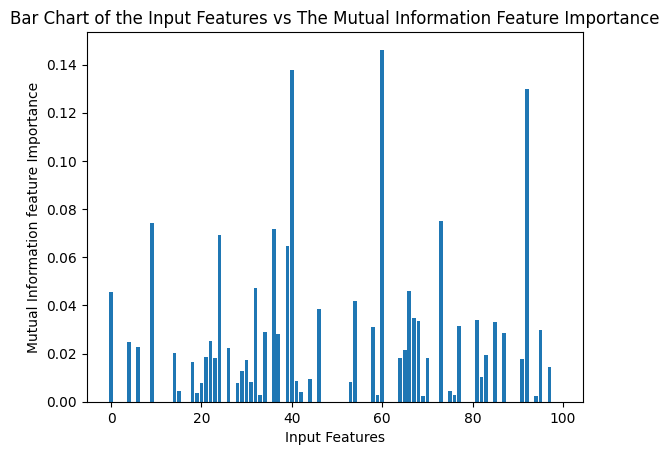

In [5]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import make_regression

def sle_fea(X_train, y_train, X_test):
    mu = SelectKBest(score_func= mutual_info_regression, k='all')
    mu.fit(X_train, y_train)
    X_train_mu = mu.transform(X_train)
    X_test_mu = mu.transform(X_test)
    return X_train_mu, X_test_mu, mu

X, y = make_regression(n_samples= 1000, n_features= 100, n_informative=10,noise=0.1, random_state=1)
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# selecting the features
X_train_mu, X_test_mu, mu = sle_fea(X_train, y_train, X_test)
# checking the score of the features
for i in range(len(mu.scores_)):
    print(f"Features: {i} {mu.scores_[i]:.3f}")

plt.bar([i for i in range(len(mu.scores_))], mu.scores_)
plt.title('Bar Chart of the Input Features vs The Mutual Information Feature Importance')
plt.xlabel('Input Features')
plt.ylabel('Mutual Information feature Importance')
plt.show()

#### Mean absolute Error for All three cases

In [7]:
# First we will check for all the features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples= 1000, n_features= 100, n_informative= 10, noise= 0.1, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.33, random_state= 1)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

mae= mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.3f}")

MAE: 0.086


In [8]:
# Evaluation of a model using 10 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


In [9]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=88)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.084


#### Tune the Number of Selected Features
How do we know how many features are important? Instead of guessing we can systematically test a range of different numbers of different selected features and discover which result in the best performing model. This is called grid search where k argument in the select k best can be tuned.

In [11]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

Best MAE: -0.082
Best Config: {'sel__k': 81}
>-1.100 with: {'sel__k': 80}
>-0.082 with: {'sel__k': 81}
>-0.082 with: {'sel__k': 82}
>-0.082 with: {'sel__k': 83}
>-0.082 with: {'sel__k': 84}
>-0.082 with: {'sel__k': 85}
>-0.082 with: {'sel__k': 86}
>-0.082 with: {'sel__k': 87}
>-0.082 with: {'sel__k': 88}
>-0.083 with: {'sel__k': 89}
>-0.083 with: {'sel__k': 90}
>-0.083 with: {'sel__k': 91}
>-0.083 with: {'sel__k': 92}
>-0.083 with: {'sel__k': 93}
>-0.083 with: {'sel__k': 94}
>-0.083 with: {'sel__k': 95}
>-0.083 with: {'sel__k': 96}
>-0.083 with: {'sel__k': 97}
>-0.083 with: {'sel__k': 98}
>-0.083 with: {'sel__k': 99}
>-0.083 with: {'sel__k': 100}


In [12]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

num_feature= [i for i in range(X.shape[1]-19, X.shape[1]+1)]

results = list()
for k in num_feature:
    model= LinearRegression()
    fs = SelectKBest(score_func= mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel', fs),  ('lr', model)])
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X,y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
    results.append(scores)
    print(f'{k:d},{np.mean(scores):.3f}, {np.std(scores):.3f}')

81,-0.082, 0.006
82,-0.082, 0.006
83,-0.082, 0.006
84,-0.082, 0.006
85,-0.082, 0.006
86,-0.082, 0.006
87,-0.082, 0.006
88,-0.082, 0.006
89,-0.083, 0.006
90,-0.083, 0.006
91,-0.083, 0.006
92,-0.083, 0.006
93,-0.083, 0.006
94,-0.083, 0.006
95,-0.083, 0.006
96,-0.083, 0.006
97,-0.083, 0.006
98,-0.083, 0.006
99,-0.083, 0.006
100,-0.083, 0.006


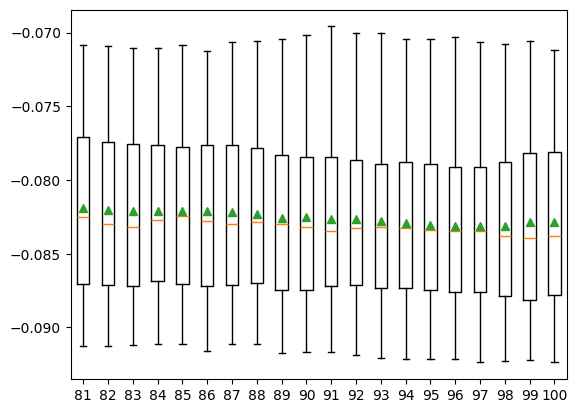

In [21]:
plt.boxplot(results, tick_labels=num_feature, showmeans= True)
plt.show()